In [1]:
from tensorflow import keras
import os, cv2
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
model = keras.models.load_model(
    "./resnet50_transfer_learning_model2.keras"
)



model

<Sequential name=sequential, built=True>

In [4]:
# 데이터 전처리 (ImageDataGenerator 사용)
# train_datagen = ImageDataGenerator(rescale=1./255,  # 정규화
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

img_size = (300, 300)
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1.0 / 255, horizontal_flip=True)  # 정규화
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# 훈련 데이터 및 검증 데이터 설정 (경로를 자신의 데이터셋에 맞게 설정하세요)
train_generator = train_datagen.flow_from_directory(
    "./dataset/train_added/",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
)  # 이진 분류

validation_generator = test_datagen.flow_from_directory(
    "./dataset/validation/",
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",
)  # 이진 분류

Found 2890 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [5]:
# 모델 검증
results = model.evaluate(validation_generator)
print("test loss, test acc:", results)

c:\Users\user\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 994ms/step - accuracy: 1.0000 - loss: 1.5798e-05
test loss, test acc: [1.2633097867364995e-05, 1.0]


In [5]:
# 이미지 전처리
dlist = "./dataset/test/"
predict_list = os.listdir(dlist)
print(predict_list)

img = [cv2.imread(dlist + i) for i in predict_list]
img = [cv2.resize(i, (300, 300)) for i in img]
img = np.array(img)
img = img.astype("float32") / 255.0

# 분류
cutoff = 0.5
predictions = model.predict(img)
print(predictions >= cutoff)

['horse (1).jpg', 'horse (1).png', 'horse (10).jpg', 'horse (11).jpg', 'horse (12).jpg', 'horse (13).jpg', 'horse (14).jpg', 'horse (15).jpg', 'horse (16).jpg', 'horse (17).jpg', 'horse (18).jpg', 'horse (19).jpg', 'horse (2).jpg', 'horse (2).png', 'horse (20).jpg', 'horse (21).jpg', 'horse (22).jpg', 'horse (23).jpg', 'horse (24).jpg', 'horse (25).jpg', 'horse (26).jpg', 'horse (27).jpg', 'horse (28).jpg', 'horse (29).jpg', 'horse (3).jpg', 'horse (3).png', 'horse (30).jpg', 'horse (31).jpg', 'horse (32).jpg', 'horse (33).jpg', 'horse (34).jpg', 'horse (35).jpg', 'horse (36).jpg', 'horse (37).jpg', 'horse (38).jpg', 'horse (39).jpg', 'horse (4).jpg', 'horse (4).png', 'horse (40).jpg', 'horse (41).jpg', 'horse (42).jpg', 'horse (43).jpg', 'horse (44).jpg', 'horse (45).jpg', 'horse (46).jpg', 'horse (47).jpg', 'horse (48).jpg', 'horse (49).jpg', 'horse (5).jpg', 'horse (50).jpg', 'horse (51).jpg', 'horse (52).jpg', 'horse (53).jpg', 'horse (54).jpg', 'horse (55).jpg', 'horse (56).jpg', 

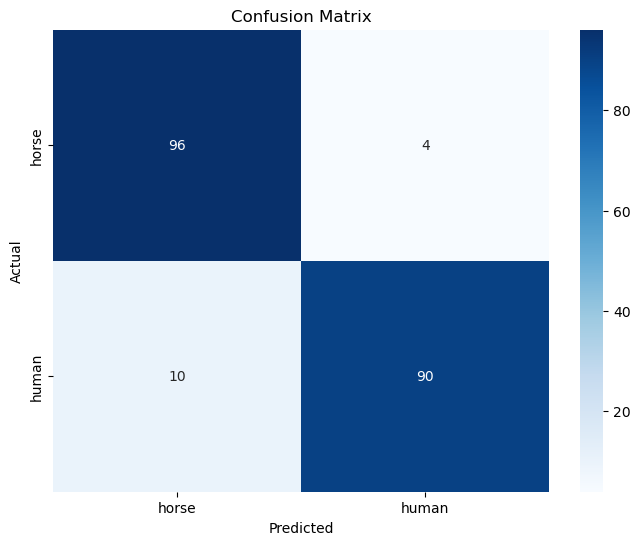

In [7]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_true = np.array([0] * 100 + [1] * 100)
y_pred = predictions
y_pred_classes = np.round(y_pred).astype(int).flatten()  # 예측값을 0 또는 1로 변환

# Confusion Matrix 계산
cm = confusion_matrix(y_true, y_pred_classes)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["horse", "human"],
    yticklabels=["horse", "human"],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [6]:
dlist = "./dataset/test/"
predict_list = [f for f in os.listdir(dlist) if f.lower().endswith(('jpg', 'jpeg', 'png', 'webp'))]  # 이미지 파일만 선택
# 실제 레이블 설정 (파일 이름에 따라 설정)
true_labels = []
for file_name in predict_list:
    if "human" in file_name or "사람" in file_name:  # 사람을 나타내는 파일명에 따라 레이블 설정
        true_labels.append(1)  # 사람 -> 1
    elif "horse" in file_name or "말" in file_name:  # 말을 나타내는 파일명에 따라 레이블 설정
        true_labels.append(0)  # 말 -> 0
print(f"레이블 개수: {len(true_labels)}, 이미지 파일 개수: {len(predict_list)}")
# 실제 레이블과 예측할 이미지 개수가 일치하는지 확인
assert len(true_labels) == len(predict_list), "레이블과 이미지 파일 개수가 일치하지 않습니다."
# 이미지 전처리
img = [cv2.imread(dlist + i) for i in predict_list]
img = [cv2.resize(i, (300, 300)) for i in img]  # 모델 입력 크기에 맞게 이미지 크기 조정
img = np.array(img)
img = img.astype('float32') / 255.0  # 정규화
# 모델 분류
cutoff = 0.5  # 분류 기준점
predictions = model.predict(img)  # 모델의 예측 값 반환
# 예측 레이블 및 혼동 행렬 생성용 데이터
predicted_labels = []
correct_count = 0
total_count = len(predictions)
for idx, prediction in enumerate(predictions):
    file_name = predict_list[idx]
    # 예측 확률 및 레이블 처리 (바이너리 분류)
    confidence = prediction[0]  # 이진 분류로 예측된 단일 확률 값을 사용
    predicted_label = 1 if confidence >= cutoff else 0  # cutoff에 따른 예측 레이블
    predicted_labels.append(predicted_label)  # 예측된 레이블 저장
    # 실제 레이블과 예측 레이블을 비교
    if predicted_label == true_labels[idx]:
        correct_count += 1  # 맞춘 경우 카운트 증가
    # 파일 이름과 확률 출력
    if predicted_label == 1:
        print(f"{file_name}: 사람, 확률: {confidence:.2f}")
    else:
        print(f"{file_name}: 말, 확률: {1 - confidence:.2f}")
# 전체 맞춘 비율 (정확도) 계산
accuracy = correct_count / total_count
print(f"\n전체 맞춘 비율(정확도): {accuracy * 100:.2f}%")
# 혼동 행렬 계산
cm = confusion_matrix(true_labels, predicted_labels)
# 혼동 행렬 시각화
plt.figure(figsize=(6.5, 6.5))  # 기본 크기의 1.3배
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=['Horse', 'Human'], yticklabels=['Horse', 'Human'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()








레이블 개수: 200, 이미지 파일 개수: 200
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step  
horse (1).jpg: 말, 확률: 1.00
horse (1).png: 말, 확률: 1.00
horse (10).jpg: 말, 확률: 1.00
horse (11).jpg: 말, 확률: 1.00
horse (12).jpg: 말, 확률: 1.00
horse (13).jpg: 말, 확률: 1.00
horse (14).jpg: 말, 확률: 1.00
horse (15).jpg: 말, 확률: 1.00
horse (16).jpg: 말, 확률: 1.00
horse (17).jpg: 사람, 확률: 0.94
horse (18).jpg: 말, 확률: 1.00
horse (19).jpg: 말, 확률: 1.00
horse (2).jpg: 말, 확률: 1.00
horse (2).png: 말, 확률: 1.00
horse (20).jpg: 말, 확률: 1.00
horse (21).jpg: 말, 확률: 1.00
horse (22).jpg: 말, 확률: 0.99
horse (23).jpg: 말, 확률: 1.00
horse (24).jpg: 말, 확률: 1.00
horse (25).jpg: 말, 확률: 1.00
horse (26).jpg: 말, 확률: 1.00
horse (27).jpg: 말, 확률: 1.00
horse (28).jpg: 말, 확률: 1.00
horse (29).jpg: 말, 확률: 1.00
horse (3).jpg: 말, 확률: 1.00
horse (3).png: 사람, 확률: 1.00
horse (30).jpg: 말, 확률: 1.00
horse (31).jpg: 말, 확률: 1.00
horse (32).jpg: 말, 확률: 1.00
horse (33).jpg: 말, 확률: 1.00
horse (34).jpg: 말, 확률: 1.00
horse (35).jpg: 말, 확률: 1.00
horse (36).jpg: 말, 확률: 1.00
horse (37).jpg

NameError: name 'confusion_matrix' is not defined